In [31]:
import mne
#%gui qt
#import matplotlib

#%matplotlib qt
import numpy as np
from matplotlib import pyplot as plt
from stormdb.access import Query
from pickle import load
from scipy import stats
from mne.datasets import sample
from mne.stats import spatio_temporal_cluster_1samp_test
import os
import pickle
from copy import deepcopy
import ipywidgets as widgets
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# os.environ['ETS_TOOLKIT'] = 'qt4'
# os.environ['QT_API'] = 'pyqt5'
# %gui qt
#mne.viz.set_3d_backend("notebook")

In [32]:
## Some functions

def plot_brain(time, x, y, z, cl, cm, ch):
    ip = np.array([x,y,z])*0.001
    brain = cstc.plot(src=src_sample, mode='stat_map',initial_time=time, initial_pos = ip,
                      clim={'kind': 'value', 'pos_lims': [cl,cm,ch]})
 
def brain_interact():
    _ = widgets.interact(plot_brain, 
                         time = widgets.FloatSlider(value = cstc.times[0], min = cstc.times[0], 
                                                    max = cstc.times[-1], step = 0.01, description = 'time'),
                         x = widgets.FloatSlider(value = 0, min = -100, max = 100, step = 5, description = 'x'),
                         y = widgets.FloatSlider(value = 0, min = -100, max = 100, step = 5, description = 'y'),
                         z = widgets.FloatSlider(value = 0, min = -100, max = 100, step = 5, description = 'z'),
                         cl = widgets.FloatSlider(value = 0.001, min = 0, max = 0.5, step = 0.01, description = 'clim low'),
                         cm = widgets.FloatSlider(value = 0.03, min = 0.001, max = 0.5, step = 0.01, description = 'clim mid'),
                         ch = widgets.FloatSlider(value = 0.2, min = 0.001, max = 0.5, step = 0.01, description = 'clim high'))

In [33]:
proj_name = 'MINDLAB2020_MEG-AuditoryPatternRecognition'
wdir = '/projects/' + proj_name + '/scratch/working_memory/'
stats_dir = wdir + 'results/stats/'
data_dir = wdir + 'averages/data/'

subs_dir = '/projects/' + proj_name + '/scratch/fs_subjects_dir/'
sample_path = sample.data_path()
sample_subjects_dir = sample_path + '/subjects'
src_sample = mne.read_source_spaces(subs_dir +
                                    'fsaverage/bem/fsaverage-vol-5-src.fif')

    Reading a source space...
    [done]
    1 source spaces read


In [50]:
# Read stats
#bands = ['theta']#,'alpha','beta1','beta2']#['theta','alpha','beta1','beta2']
#times = {'delay': [2,4]}#,'delay': [2,4],'recall': [4,6.25]}
#bands = ['delta','theta','alpha','beta1','beta2','HFA']#['theta','alpha','beta1','beta2']
bands = ['theta','alpha','beta1']
times = {'encoding': [0,2]}#,'delay': [2,4],'retrieval': [4,6.25]}
#times = {'recall': [4,6.25]}
stats_results = {}
for b in bands:
    stats_results[b] = {}
    for tn in times:
        t = times[tn]
        csfname = '{}TFR_{}_montecarlo_{}-{}_new.py'.format(stats_dir, b, np.round(float(t[0]),2), np.round(float(t[1]),2))
        cfile = open(csfname,'rb')
        stats_results[b][tn] = pickle.load(cfile)
        cfile.close()
print(stats_results)

{'beta1': {'encoding': {'all': {'mask': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]]), 'tvals': array([[-1.24370729, -1.21565806, -1.18440734, ..., -0.54077508,
        -0.62437136, -0.73131726],
       [-1.60834947, -1.61403741, -1.53960459, ..., -0.66767019,
        -0.73367498, -0.81120894],
       [-1.23831378, -1.11553781, -1.03757569, ..., -0.00938396,
        -0.08459418, -0.19422851],
       ...,
       [-1.69589953, -1.47316123, -1.12150377, ..., -6.14676263,
        -6.06906864, -6.0446757 ],
       [-1.63844901, -1.44798316, -1.12176081, ..., -6.33129507,
        -6.30369471, -6.32421179],
       [-1.25912236, -1.15599806, -0.94542629, ..., -6.51333494,
        -6.52094648, -6.58061799]]), 'pvals': array([0.47 , 1.   , 1.   , 1.   , 1.   , 0.15 , 1.   , 1.   , 1.   ,
       1.   , 1.

In [35]:
# Load and morph a source time course
dfname = data_dir + '0021_LZW_TFR_src2_delta.p'
dfile = open(dfname,'rb')
all_stc = pickle.load(dfile)
dfile.close()
stc = deepcopy(all_stc['same'])
del all_stc

# load source morph
morph = mne.read_source_morph(subs_dir + '0021_LZW/bem/0021_LZW_vol-morph.h5')
stc = morph.apply(stc)
print(stc)

<VolSourceEstimate | 14343 vertices, subject : fsaverage, tmin : -1250.0 (ms), tmax : 6500.0 (ms), tstep : 10.0 (ms), data shape : (14343, 776), ~85.0 MB>


In [45]:
b = 'alpha'
p = 'encoding'
c = 'manipulation_diff'
cstc = stc
mask = stats_results[b][p][c]['mask']
cstc.data = stats_results[b][p][c]['data_mean']*mask#
cstc.tmin = times[p][0]

In [46]:
brain_interact()

interactive(children=(FloatSlider(value=0.0, description='time', max=2.0, step=0.01), FloatSlider(value=0.0, d…

alpha delay maintenance 2.0
Fixing initial time: 2.0 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.000 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


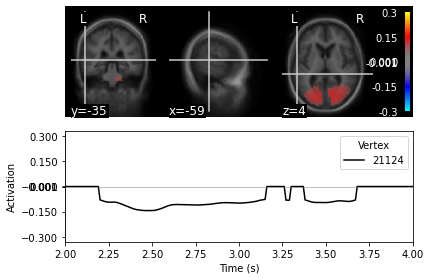

alpha delay maintenance 2.1
Fixing initial time: 2.1 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.100 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


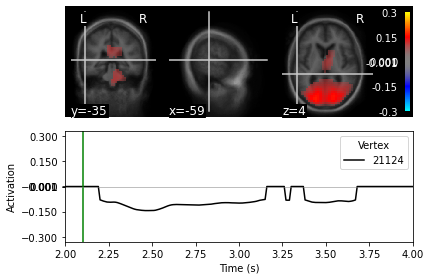

alpha delay maintenance 2.2
Fixing initial time: 2.2 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.200 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


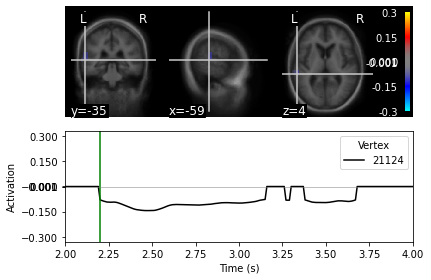

alpha delay maintenance 2.3
Fixing initial time: 2.3 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.300 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


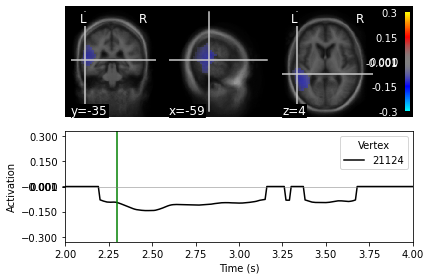

alpha delay maintenance 2.4
Fixing initial time: 2.4 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.400 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


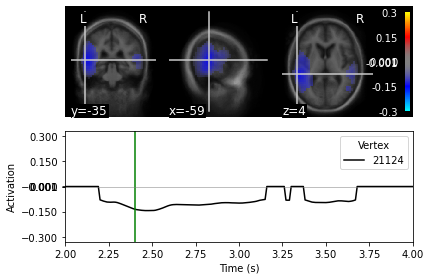

alpha delay maintenance 2.5
Fixing initial time: 2.5 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.500 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


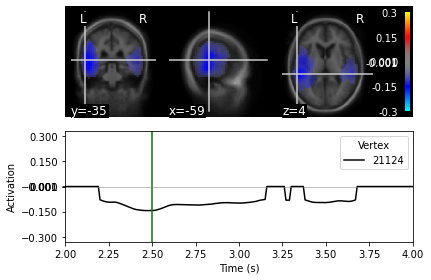

alpha delay maintenance 2.6
Fixing initial time: 2.6 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.600 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


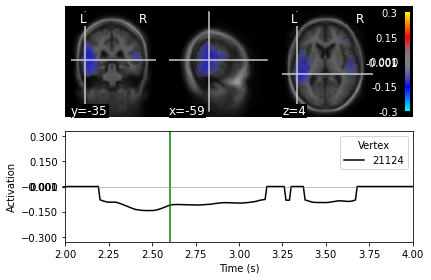

alpha delay maintenance 2.7
Fixing initial time: 2.7 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.700 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


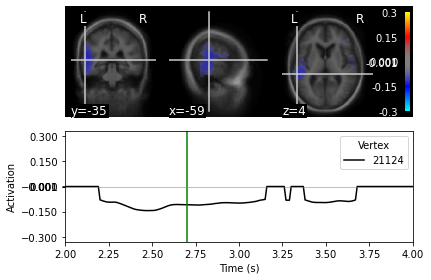

alpha delay maintenance 2.8
Fixing initial time: 2.8 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.800 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


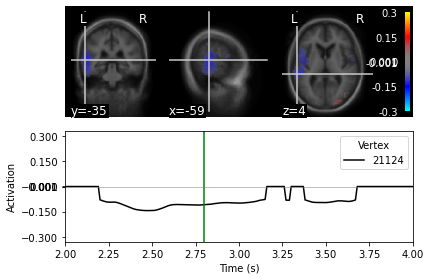

alpha delay maintenance 2.9
Fixing initial time: 2.9 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.900 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


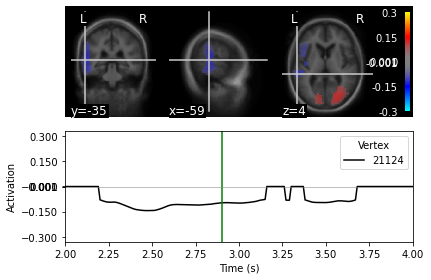

alpha delay maintenance 3.0
Fixing initial time: 3.0 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.000 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


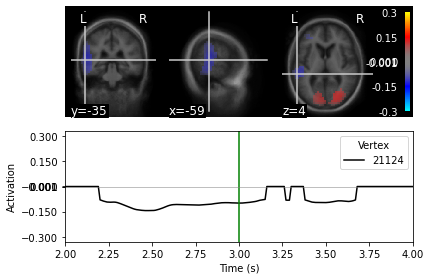

alpha delay maintenance 3.1
Fixing initial time: 3.1 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.100 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


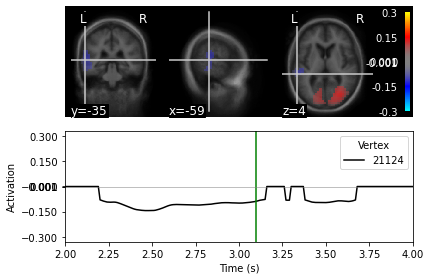

alpha delay maintenance 3.2
Fixing initial time: 3.2 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.200 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


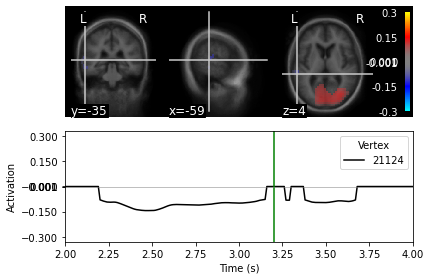

alpha delay maintenance 3.3
Fixing initial time: 3.3 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.300 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


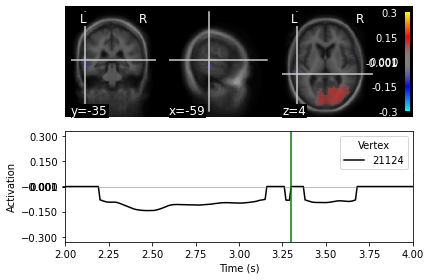

alpha delay maintenance 3.4000000000000004
Fixing initial time: 3.4000000000000004 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.400 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


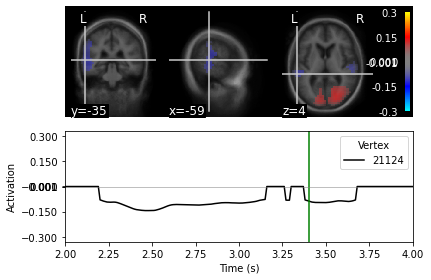

alpha delay maintenance 3.5
Fixing initial time: 3.5 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.500 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


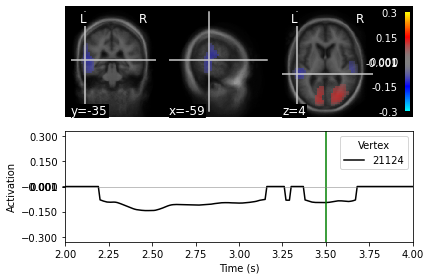

alpha delay maintenance 3.6
Fixing initial time: 3.6 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.600 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


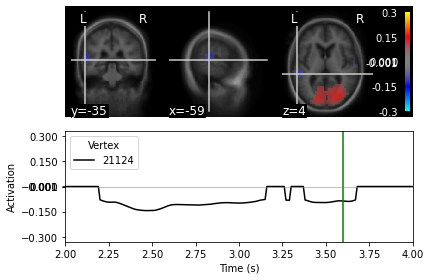

alpha delay maintenance 3.7
Fixing initial time: 3.7 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.700 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


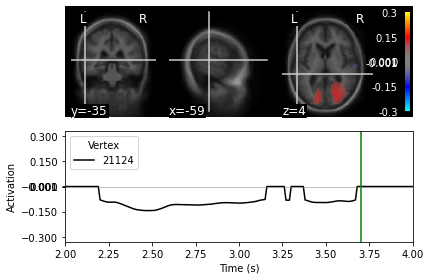

alpha delay maintenance 3.8
Fixing initial time: 3.8 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.800 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


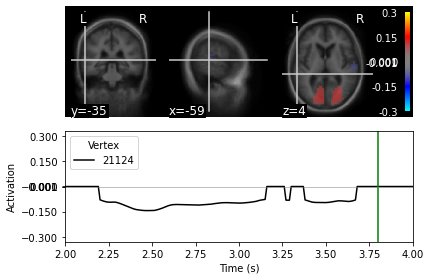

alpha delay maintenance 3.9000000000000004
Fixing initial time: 3.9000000000000004 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.900 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


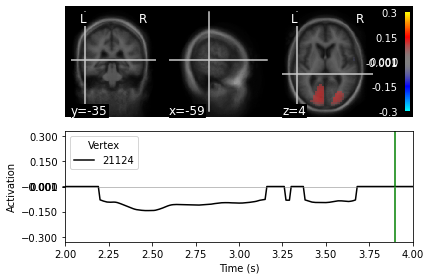

alpha delay manipulation 2.0
Fixing initial time: 2.0 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.000 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


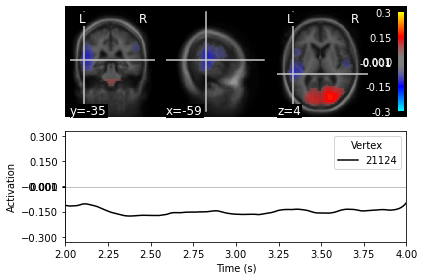

alpha delay manipulation 2.1
Fixing initial time: 2.1 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.100 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


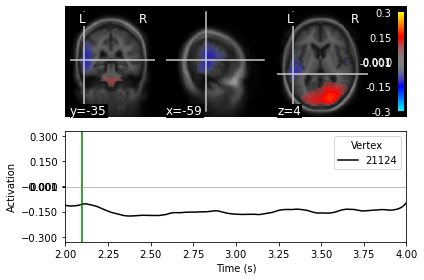

alpha delay manipulation 2.2
Fixing initial time: 2.2 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.200 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


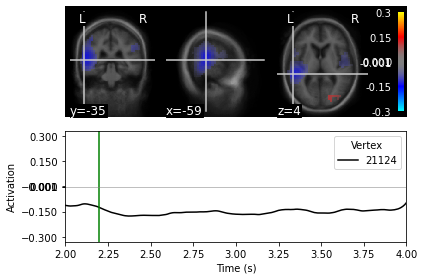

alpha delay manipulation 2.3
Fixing initial time: 2.3 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.300 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


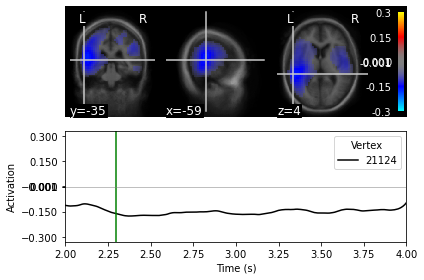

alpha delay manipulation 2.4
Fixing initial time: 2.4 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.400 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


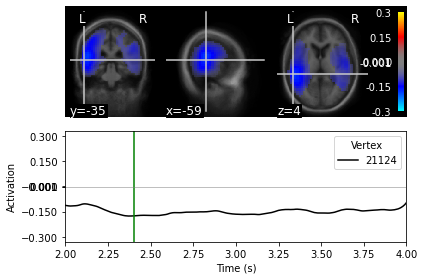

alpha delay manipulation 2.5
Fixing initial time: 2.5 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.500 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


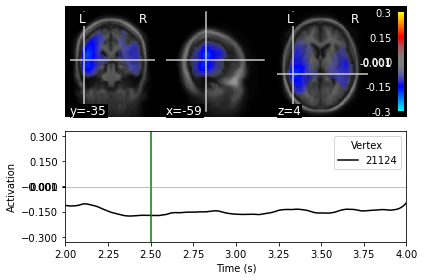

alpha delay manipulation 2.6
Fixing initial time: 2.6 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.600 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


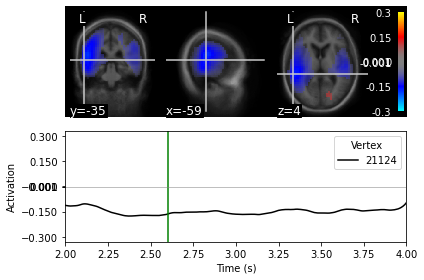

alpha delay manipulation 2.7
Fixing initial time: 2.7 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.700 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


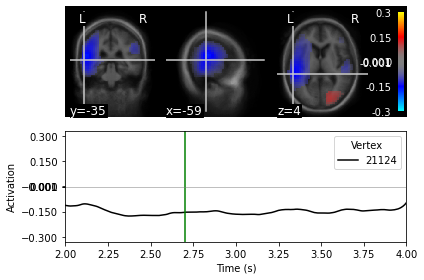

alpha delay manipulation 2.8
Fixing initial time: 2.8 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.800 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


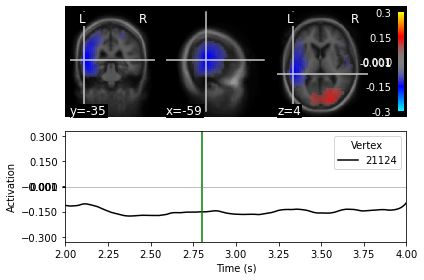

alpha delay manipulation 2.9
Fixing initial time: 2.9 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 2.900 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


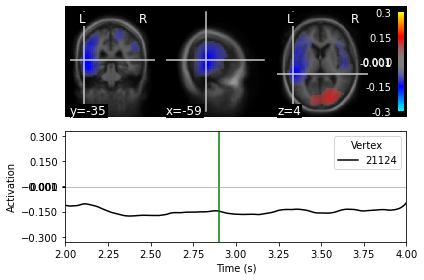

alpha delay manipulation 3.0
Fixing initial time: 3.0 sec
Fixing initial position: [-60.0, -35.0, 5.0] mm
Showing: t = 3.000 s, (-60.0, -35.0, 5.0) mm, [4, 16, 16] vox, 21124 vertex


KeyboardInterrupt: 

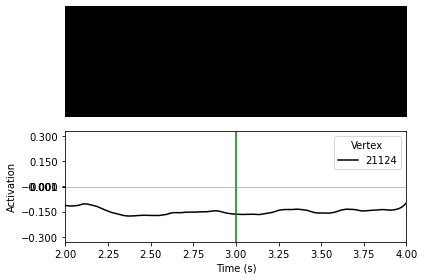

In [39]:
# # Plot 1 stc
# for b in ['alpha']: #stats:
#     for p in ['delay']:#stats[b]:
#         for c in ['maintenance','manipulation']:#stats[b][p]:
#             #mask = stats[b][p][c]['qvals'] <= .0001
#             mask = stats[b][p][c]['mask']
#             stc.data = stats[b][p][c]['data_mean']*mask#
#             stc.tmin = times[p][0]
#             plot_times = np.arange(0,2,0.1)

#             for pt in plot_times:
#                 print('{} {} {} {}'.format(b,p,c,stc.tmin+pt))
#                 brain = stc.plot(subjects_dir=subs_dir,initial_time = stc.tmin+pt,clim={'kind': 'value', 'pos_lims': [0.001,0.15,0.3]},#time_viewer=True,
#                                      subject='fsaverage', mode = 'stat_map',src=src_sample, initial_pos=[-0.06,-0.035,0.005])

beta1 encoding all
Showing: t = 0.260 s, (25.0, -80.0, -5.0) mm, [21, 7, 14] vox, 18270 vertex


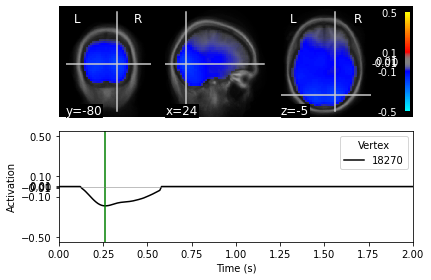

beta1 encoding maintenance
Showing: t = 0.260 s, (25.0, -80.0, -5.0) mm, [21, 7, 14] vox, 18270 vertex


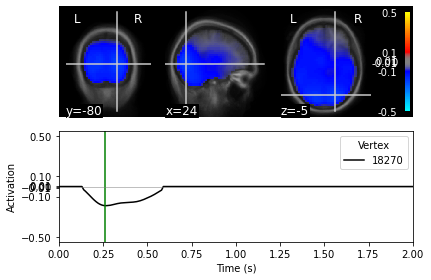

beta1 encoding manipulation
Showing: t = 0.250 s, (20.0, -80.0, -5.0) mm, [20, 7, 14] vox, 18269 vertex


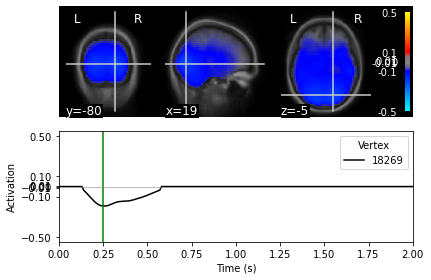

beta1 encoding maintenance_diff
Showing: t = 0.000 s, (0.0, -55.0, -65.0) mm, [16, 12, 2] vox, 2986 vertex


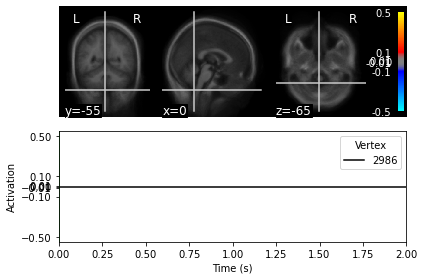

beta1 encoding manipulation_diff
Showing: t = 0.000 s, (0.0, -55.0, -65.0) mm, [16, 12, 2] vox, 2986 vertex


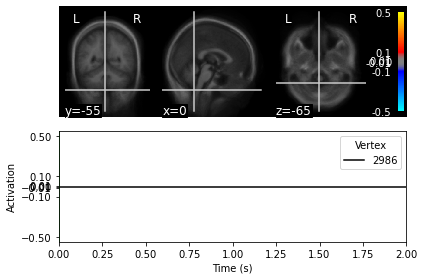

beta1 encoding interaction
Showing: t = 0.000 s, (0.0, -55.0, -65.0) mm, [16, 12, 2] vox, 2986 vertex


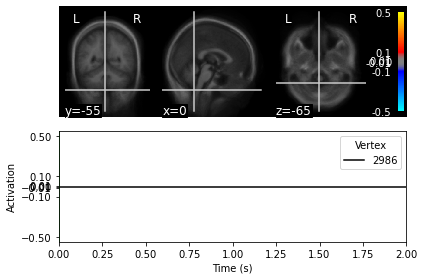

In [51]:
for b in ['beta1']:#stats_results:#stats:
    for p in stats_results[b]: 
        for c in stats_results[b][p]:
            #mask = stats[b][p][c]['qvals'] <= .00001
            mask = stats_results[b][p][c]['mask']
            stc.data = stats_results[b][p][c]['data_mean']*mask#stats[b][p][c]['mask']
            stc.tmin = times[p][0]
            print('{} {} {}'.format(b,p,c))
            brain = stc.plot(subjects_dir=subs_dir,clim={'kind': 'value', 'pos_lims': [0.01,0.1,0.5]},#time_viewer=True,
                                 subject='fsaverage', mode = 'stat_map',src=src_sample)#,initial_pos=[-0.03,-.02,0.045])

In [9]:
sample_path = sample.data_path()
sample_subjects_dir = sample_path + '/subjects'
label_file = sample_subjects_dir + '/fsaverage/mri/aparc.a2009s+aseg.mgz'
labels = mne.get_volume_labels_from_aseg(label_file)

In [10]:
for l in labels:
    print(l)

Unknown
Left-Cerebral-White-Matter
Left-Lateral-Ventricle
Left-Inf-Lat-Vent
Left-Cerebellum-White-Matter
Left-Cerebellum-Cortex
Left-Thalamus-Proper
Left-Caudate
Left-Putamen
Left-Pallidum
3rd-Ventricle
4th-Ventricle
Brain-Stem
Left-Hippocampus
Left-Amygdala
CSF
Left-Accumbens-area
Left-VentralDC
Left-vessel
Left-choroid-plexus
Right-Cerebral-White-Matter
Right-Lateral-Ventricle
Right-Inf-Lat-Vent
Right-Cerebellum-White-Matter
Right-Cerebellum-Cortex
Right-Thalamus-Proper
Right-Caudate
Right-Putamen
Right-Pallidum
Right-Hippocampus
Right-Amygdala
Right-Accumbens-area
Right-VentralDC
Right-vessel
Right-choroid-plexus
WM-hypointensities
Optic-Chiasm
CC_Posterior
CC_Mid_Posterior
CC_Central
CC_Mid_Anterior
CC_Anterior
ctx_lh_G_and_S_frontomargin
ctx_lh_G_and_S_occipital_inf
ctx_lh_G_and_S_paracentral
ctx_lh_G_and_S_subcentral
ctx_lh_G_and_S_transv_frontopol
ctx_lh_G_and_S_cingul-Ant
ctx_lh_G_and_S_cingul-Mid-Ant
ctx_lh_G_and_S_cingul-Mid-Post
ctx_lh_G_cingul-Post-dorsal
ctx_lh_G_cingul-Po

In [14]:
clabels = ['ctx_lh_G_precentral',
           'ctx_rh_G_precentral',
           'ctx_lh_G_orbital',
           'ctx_rh_G_orbital',
           'ctx_lh_G_and_S_transv_frontopol',
           'ctx_rh_G_and_S_transv_frontopol',
           'ctx_lh_G_and_S_cingul-Mid-Post',
           'ctx_rh_G_and_S_cingul-Mid-Post',
           'ctx_lh_G_temp_sup-G_T_transv',
           'ctx_rh_G_temp_sup-G_T_transv']

stc_labels = {}
for b in stats_results:#stats_results:#stats:
    stc_labels[b] = {}
    for p in stats_results[b]:
        stc_labels[b][p] = {}
        for c in stats_results[b][p]:
            stc.data = stats_results[b][p][c]['data_mean'].copy() #* stats_results[c]['mask'] 
            stc_labels[b][p][c] =stc.extract_label_time_course(labels = [label_file,clabels], src = src_sample, mode = 'auto')

Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the source space
Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the source space
Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the source space
Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the source space
Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the sour

Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the source space
Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the source space
Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the source space
Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/10 atlas regions had at least one vertex in the source space
Extracting time courses for 10 labels (mode: mean)
Reading atlas /users/david/mne_data/MNE-sample-data/subjects/fsaverage/mri/aparc.a2009s+aseg.mgz
10/1

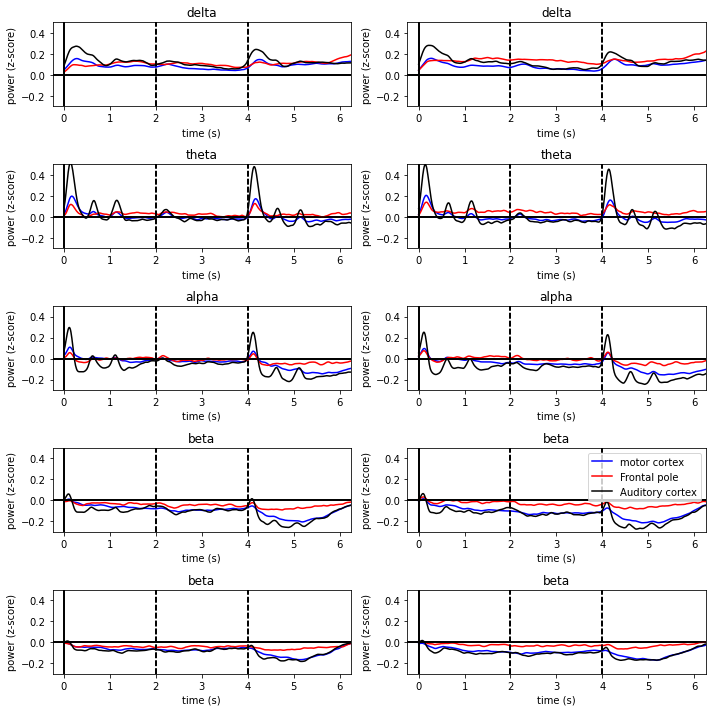

In [34]:
cur_labs = ['motor cortex','Frontal pole','Auditory cortex']
titles = ['delta','theta','alpha','beta','beta']
colors = ['blue','red','black']
fig, axes = plt.subplots(ncols=2,nrows=5, figsize = (10,10))
for bidx, b in enumerate(stc_labels):
    for cidx, c in enumerate(['maintenance','manipulation']):
        for pidx, p in enumerate(stc_labels[b]): 
            stc.data = stats_results[b][p][c]['data_mean']
            stc.tmin = times[p][0]
            ctimes = stc.times
            rix, cix = bidx, cidx
            lcount = -1
            for lidx in range(len(stc_labels[b][p][c])):
                if lidx in [1,5,9]:
                    lcount = lcount + 1
                    axes[rix,cix].plot(ctimes,stc_labels[b][p][c][lidx], color = colors[lcount])
            axes[rix, cix].set_title(titles[bidx])
            axes[rix, cix].set_ylim(-.3,.5)
            axes[rix, cix].set_xlim(-0.25,6.25)
            axes[rix, cix].set_xlabel('time (s)')
            axes[rix, cix].set_ylabel('power (z-score)')
            axes[rix, cix].axhline(0., color='k')
            axes[rix, cix].axvline(0., color='k')
            axes[rix, cix].axvline(2., color='k',linestyle='dashed')
            axes[rix, cix].axvline(4., color='k',linestyle='dashed')
            #axes[rix, cix].legend([clabels[cls] for cls in [0,8]])
            if (rix == 3) and (cix == 1):
                axes[rix, cix].legend(cur_labs)
plt.tight_layout()
#plt.savefig(figures_dir + 'pattern_sources_labels_lh.pdf',orientation='portrait')